In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

In [129]:
#load dataset

In [130]:
dataset = pd.read_csv('inputs/ratings.csv')

In [131]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [132]:
dataset.shape

(981756, 3)

In [133]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [134]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [135]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [136]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [137]:
n_books = len(dataset.book_id.unique())
n_books

10000

In [138]:
# Creating dot product model

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/5
24544/24544 [==============================] - 123s 5ms/step - loss: 15.3063
Epoch 2/5
24544/24544 [==============================] - 120s 5ms/step - loss: 5.9098
Epoch 3/5
24544/24544 [==============================] - 119s 5ms/step - loss: 1.9985
Epoch 4/5
24544/24544 [==============================] - 120s 5ms/step - loss: 1.2528
Epoch 5/5
24544/24544 [==============================] - 121s 5ms/step - loss: 0.9840


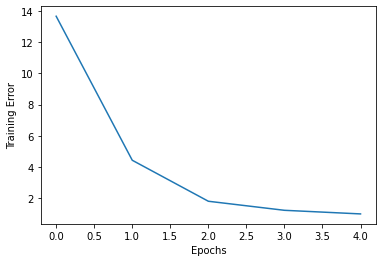

In [139]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [140]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 6s 938us/step - loss: 1.1622


1.1622049808502197

In [141]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.945952] 5
[3.792049] 4
[3.6616764] 3
[4.144376] 5
[3.5160398] 3
[3.6209214] 3
[3.7427027] 3
[5.0017715] 4
[4.1022053] 3
[4.17718] 5


[None, None, None, None, None, None, None, None, None, None]

In [142]:
# Creating Neural Network

from keras.layers import Concatenate

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
24544/24544 [==============================] - 131s 5ms/step - loss: 1.0180
Epoch 2/5
24544/24544 [==============================] - 132s 5ms/step - loss: 0.6777
Epoch 3/5
24544/24544 [==============================] - 135s 6ms/step - loss: 0.6503
Epoch 4/5
24544/24544 [==============================] - 132s 5ms/step - loss: 0.6218
Epoch 5/5
24544/24544 [==============================] - 130s 5ms/step - loss: 0.5988


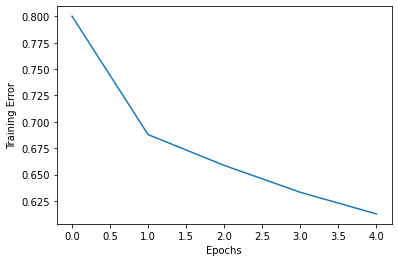

In [143]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [144]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 7s 1ms/step - loss: 0.7096


0.7096060514450073

In [145]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[5.149287] 5
[3.8702333] 4
[3.4412057] 3
[4.2800913] 5
[3.452126] 3
[3.6691349] 3
[3.3972843] 3
[4.880801] 4
[4.200246] 3
[4.2680254] 5


[None, None, None, None, None, None, None, None, None, None]

In [146]:
# Visualizing Embeddings

book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [147]:
book_em_weights[:5]

array([[ 0.04412096, -0.00180306, -0.01237631, -0.00978597, -0.01213548],
       [-1.50906   , -1.4565517 ,  1.4115441 ,  1.3729019 ,  1.2893904 ],
       [-1.4399234 , -1.3545539 ,  1.406582  ,  1.4474936 ,  1.1217843 ],
       [-1.0631886 , -0.983681  ,  0.93639284,  1.1830785 ,  1.1582212 ],
       [-1.489112  , -1.3871228 ,  1.4081169 ,  1.5337149 ,  1.2308091 ]],
      dtype=float32)

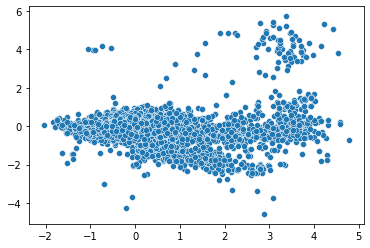

In [148]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])


In [149]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

0.9999998

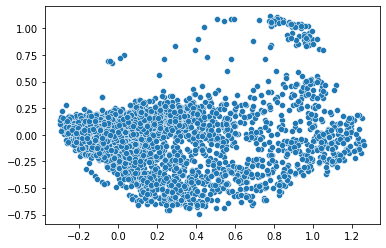

In [150]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [151]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.011s...
[t-SNE] Computed neighbors for 10001 samples in 0.627s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.023885
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.948196
[t-SNE] KL

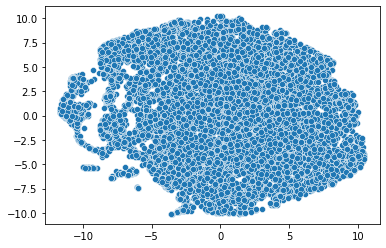

In [152]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

***Making Recommendations***

In [153]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [154]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [155]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([8258, 7638, 9872, 9805, 9982])

In [156]:
# print predicted scores
predictions[recommended_book_ids]

array([4.317466 , 4.298209 , 4.1667075, 4.161868 , 4.1334333],
      dtype=float32)

In [157]:
books = pd.read_csv('inputs/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [158]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7637,7638,12009,12009,2465248,28,1597800449,9.781598e+12,Iain M. Banks,2004.0,The Algebraist,The Algebraist,eng,3.99,13210,14793,606,185,684,3067,5984,4873,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8257,8258,18594594,18594594,26341000,41,345547497,9.780346e+12,Karin Slaughter,2014.0,Cop Town,Cop Town,eng,3.88,10660,13997,1704,274,780,3299,5612,4032,https://images.gr-assets.com/books/1384822680m...,https://images.gr-assets.com/books/1384822680s...
9804,9805,420734,420734,1784677,38,671027581,9.780671e+12,Linda Howard,2001.0,Open Season,Open Season,eng,4.01,14653,15580,705,156,588,3505,6043,5288,https://images.gr-assets.com/books/1324869940m...,https://images.gr-assets.com/books/1324869940s...
9871,9872,24480276,24480276,44074400,45,NaN,9.781475e+12,Laura Barnett,2015.0,The Versions of Us,The Versions of Us,eng,3.57,8477,11346,1685,382,1170,3457,4250,2087,https://images.gr-assets.com/books/1423155390m...,https://images.gr-assets.com/books/1423155390s...
9981,9982,12444298,12444298,21900571,1,385344422,9.780385e+12,Karen Marie Moning,2016.0,Feverborn,"Feverborn (Fever, #8)",eng,4.18,11570,14194,1891,179,521,2308,4779,6407,https://images.gr-assets.com/books/1435195536m...,https://images.gr-assets.com/books/1435195536s...


In [165]:
rec_books = books[books['id'].isin(recommended_book_ids)]
print(rec_books['title'])

7637           The Algebraist
8257                 Cop Town
9804              Open Season
9871       The Versions of Us
9981    Feverborn (Fever, #8)
Name: title, dtype: object
